# Roving oddball

Here we will follow the methods section from [Canales-Johnson et al. (2010)](https://doi.org/10.1523/JNEUROSCI.0367-21.2021). I chose this because it's recent research, because it was one of the first hits on Scopus, and because it's open access. We will go over this section bit by bit and recreate the stimuli.

Here's the relevant section:

> "We adopted a roving oddball paradigm (Cowan et al., 1993; Haenschel et al., 2005; Garrido et al., 2008). The trains of 3, 5, or 11 repetitive single tones of 20 different frequencies (250–6727 Hz with intervals of one-quarter octave) were pseudorandomly presented. Tones were identical within each tone train but differed between tone trains (Fig. 1A). Because tone trains followed on from one another continuously, the first tone of a train was considered to be an unexpected deviant tone, because it was of a different frequency than that of the preceding train. The final tone was considered to be an expected standard tone because it was preceded by several repetitions of this same tone. To avoid analytical artifacts stemming from differences in the number of standard and deviant stimuli, we considered only the last tone of a train as standard. There were 240 changes from standard to deviant tones in a single recording session. Pure sinusoidal tones lasted 64 ms (7 ms rise/fall), and stimulus onset asynchrony was 503 ms. Stimulus presentation was controlled by MATLAB (MathWorks) using the Psychophysics Toolbox extensions (Brainard, 1997; Pelli, 1997; Kleiner et al., 2007). Tones were presented through two audio speakers (Fostex) with an average intensity of 60 dB SPL around the ear of the animal."

In [1]:
from thebeat.core import Sequence, Stimulus, StimSequence
import numpy as np

rng = np.random.default_rng(seed=123)

In [2]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')

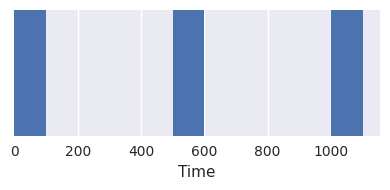

In [5]:
seq = Sequence.generate_isochronous(n=3, ioi=500)
%matplotlib inline
seq.plot_sequence(figsize=(4, 2), linewidth=100);

The IOIs are the intervals *between* the events.

In [25]:
seq_3 = Sequence.generate_isochronous(n=3, ioi=503)
seq_5 = Sequence.generate_isochronous(n=5, ioi=503)
seq_11 = Sequence.generate_isochronous(n=11, ioi=503)